
Author: Srikanth
Date:12th Dec,2020
Title:Cross-Sell_Prediction
Objective: To read Train, Test Data and predict which Customer would be interested in Insurance or not

# Problem Statement

Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. 

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
train.shape

(381109, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
train.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [8]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# #There are no Null Values associated with the data

In [9]:
train.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


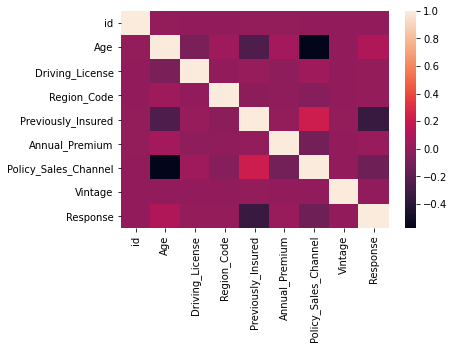

In [10]:
sns.heatmap(train.corr())

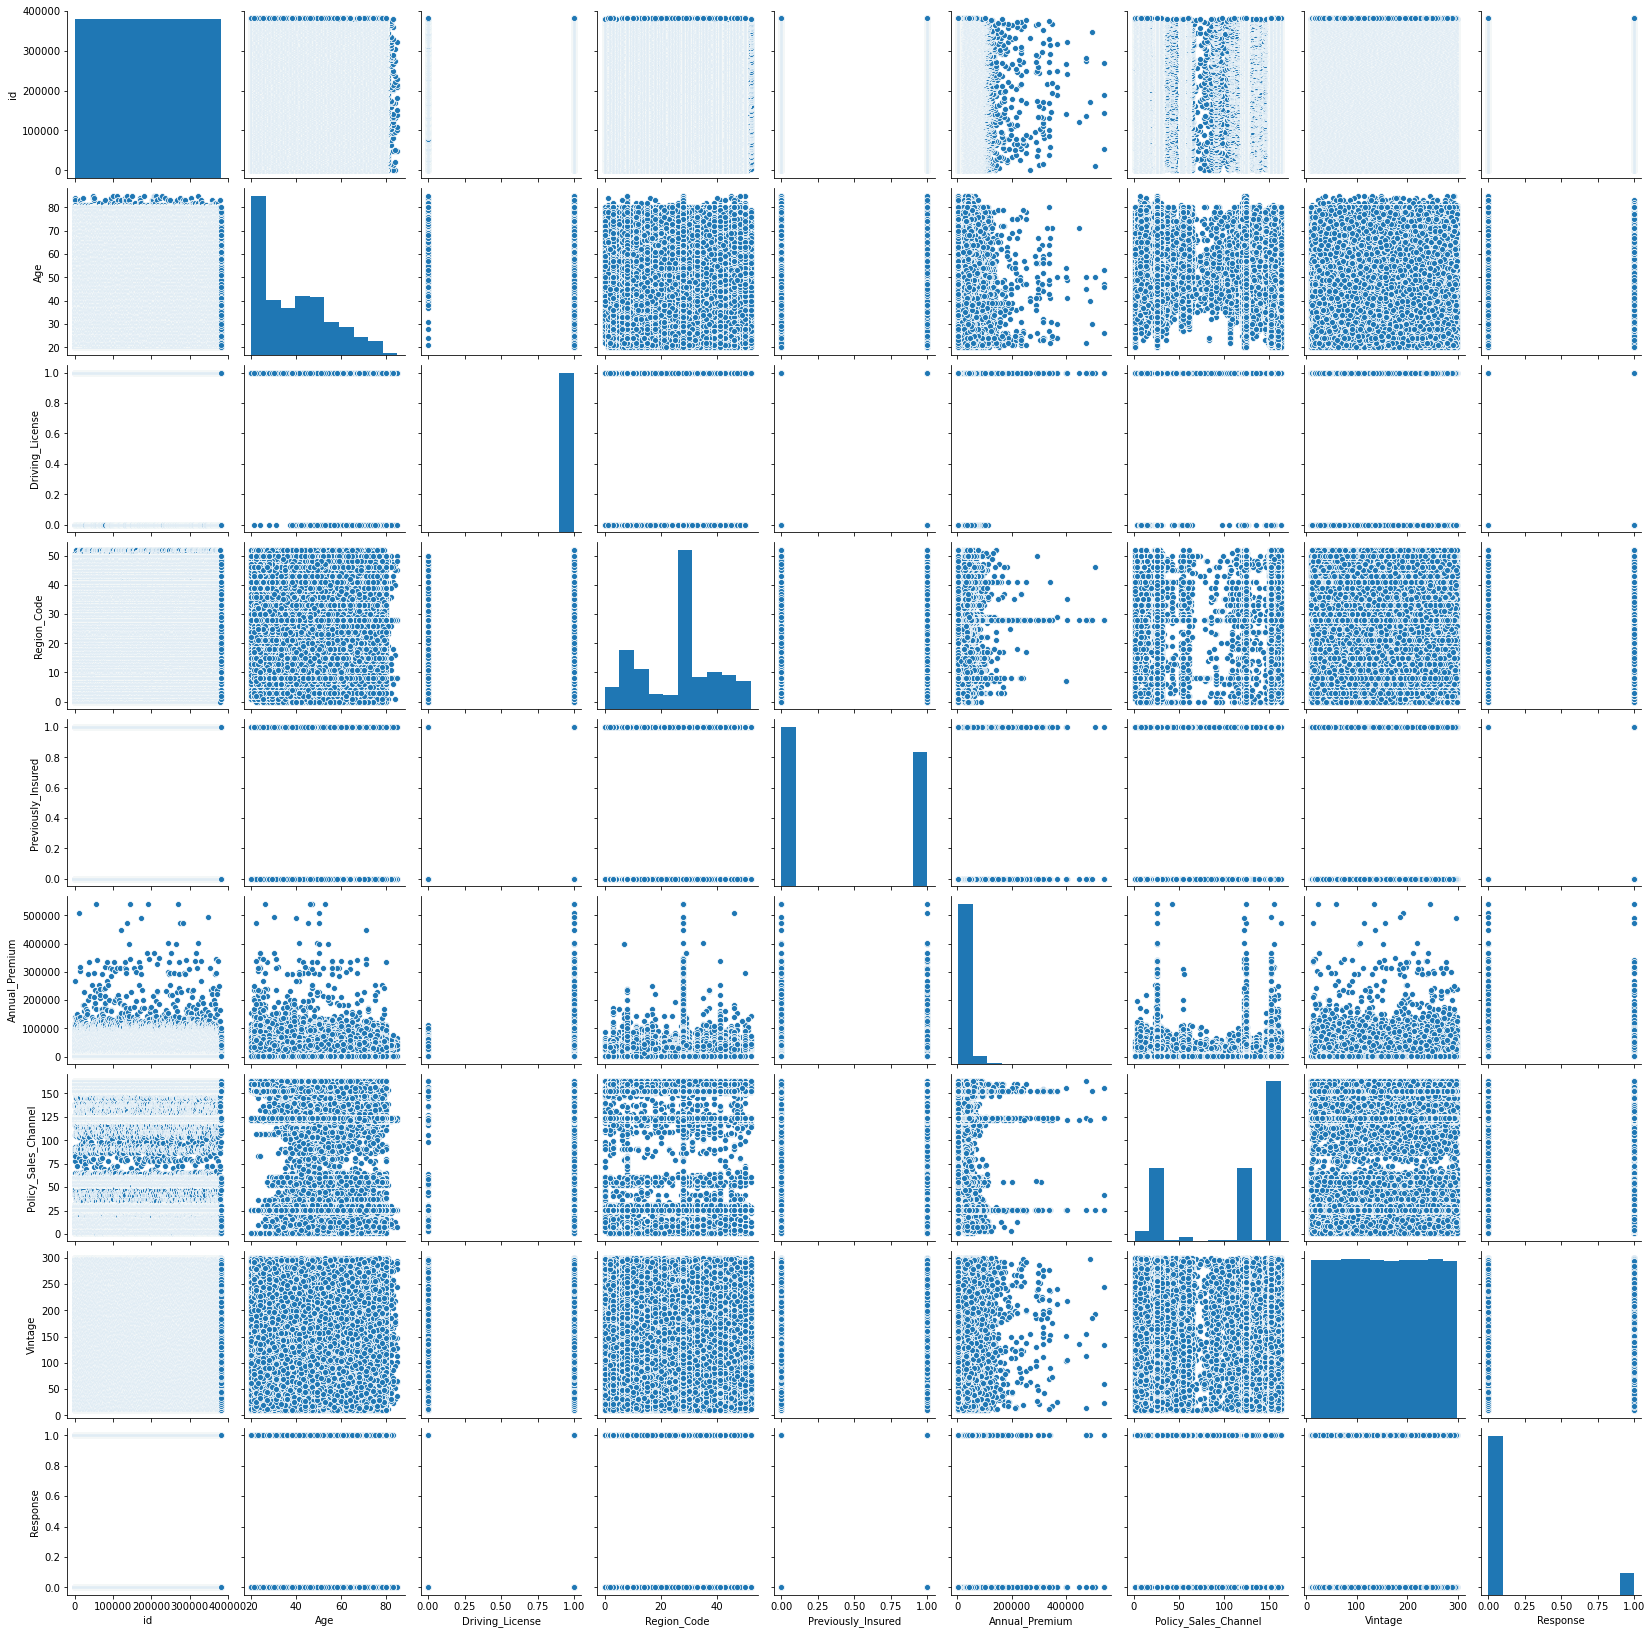

In [179]:
sns.pairplot(train)

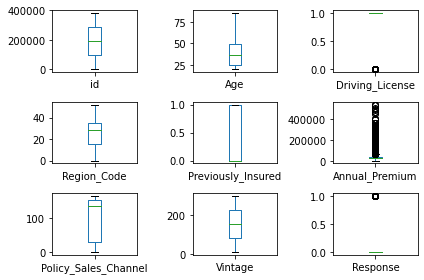

In [12]:
train.plot(kind='box',subplots=True, layout=(3,3),sharex=False)
plt.tight_layout()

In [13]:
'''i = 1
for column in train.columns[~(train.columns.isin(['Age', 'Driving_License', 'Region_Code','Previously_Insured',
                                                 'Annual_Premium','Policy_Sales_Channel','Vinatage','Response']))].tolist():
    plt.figure(figsize = (60, 10))
    plt.subplot(4, 4, i)
    sns.barplot(x = train[column].value_counts().index, y = train[column].value_counts())
    i += 1
    plt.show()'''

"i = 1\nfor column in train.columns[~(train.columns.isin(['Age', 'Driving_License', 'Region_Code','Previously_Insured',\n                                                 'Annual_Premium','Policy_Sales_Channel','Vinatage','Response']))].tolist():\n    plt.figure(figsize = (60, 10))\n    plt.subplot(4, 4, i)\n    sns.barplot(x = train[column].value_counts().index, y = train[column].value_counts())\n    i += 1\n    plt.show()"

In [14]:
train['Age'].value_counts().tail(20)

66    2725
67    2624
69    2530
68    2440
70    2349
71    2051
72    2035
73    1925
74    1832
75    1605
76    1396
77    1388
78    1216
79     915
80     909
81      56
82      29
83      22
84      11
85      11
Name: Age, dtype: int64

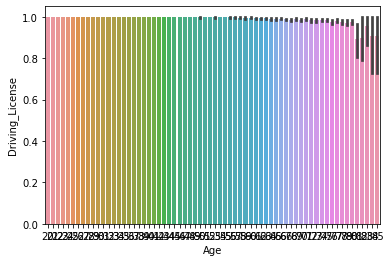

In [15]:
sns.barplot(x='Age',y='Driving_License',data=train)

In [16]:
##Age Binning
def age_bin(age):
    if 0 < age[0] <= 10:
        return '1-10'
    elif 10 < age[0] <= 20:
        return '11-20'
    elif 21 < age[0] <= 30:
        return '21-30'
    elif 31 < age[0] <= 40:
        return '31-40'
    elif 41 < age[0] <= 50:
        return '41-50'
    elif 51 < age[0] <= 60:
        return '51-60'
    elif 61 < age[0] <= 70:
        return '61-70'
    elif 71 < age[0] <= 80:
        return '71-80'
    else:
        return 'Greater than 80'

In [17]:
train['Age_bin'] = train[['Age']].apply(age_bin,axis=1)

In [18]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_bin
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,41-50
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,71-80
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,41-50
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Greater than 80
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,21-30


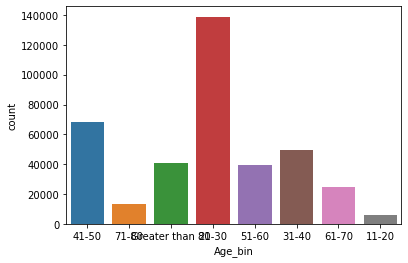

In [19]:
sns.countplot(x='Age_bin',data=train)

In [20]:
train['Age_bin'].value_counts()

21-30              138772
41-50               68205
31-40               49651
Greater than 80     41141
51-60               39390
61-70               24497
71-80               13221
11-20                6232
Name: Age_bin, dtype: int64

1) Most of the customers who opted for Medical Insurance were from Age 21-30 
2) less medical Insurance for people between Age 11-20 which is as expected
3) People of Age greater than 80 have opted for more medical Insurances as they might have more age related issues


In [21]:
train['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

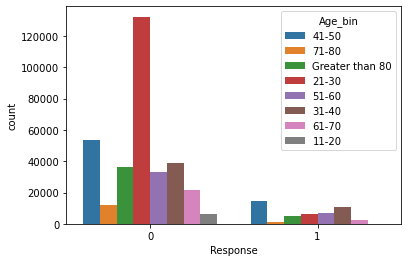

In [22]:
sns.countplot(hue='Age_bin',x='Response',data=train)

1)More Male have taken medical insurance 

In [23]:
train.groupby(['Age_bin','Response','Driving_License']).count()

id  Gender     Age  Region_Code  \
Age_bin         Response Driving_License                                        
11-20           0        1                  6061    6061    6061         6061   
                1        1                   171     171     171          171   
21-30           0        0                     2       2       2            2   
                         1                132332  132332  132332       132332   
                1        1                  6438    6438    6438         6438   
31-40           0        0                     7       7       7            7   
                         1                 38931   38931   38931        38931   
                1        1                 10713   10713   10713        10713   
41-50           0        0                    67      67      67           67   
                         1                 53728   53728   53728        53728   
                1        0                     7       7       7            7   
                         1                 14403   14403   14403        14403   
51-60           0        0                   111     111     111          111   
                         1                 32682   32682   32682        32682   
                1        0                    16      16      16           16   
                         1                  6581    6581    6581         6581   
61-70           0        0                   252     252     252          252   
                         1                 21636   21636   21636        21636   
                1        0                    13      13      13           13   
                         1                  2596    2596    2596         2596   
71-80           0        0                   262     262     262          262   
                         1                 11991   11991   11991        11991   
                1        0                     3       3       3            3   
                         1                   965     965     965          965   
Greater than 80 0        0                    70      70      70           70   
                         1                 36267   36267   36267        36267   
                1        0                     2       2       2            2   
                         1                  4802    4802    4802         4802   

                                          Previously_Insured  Vehicle_Age  \
Age_bin         Response Driving_License                                    
11-20           0        1                              6061         6061   
                1        1                               171          171   
21-30           0        0                                 2            2   
                         1                            132332       132332   
                1        1                              6438         6438   
31-40           0        0                                 7            7   
                         1                             38931        38931   
                1        1                             10713        10713   
41-50           0        0                                67           67   
                         1                             53728        53728   
                1        0                                 7            7   
                         1                             14403        14403   
51-60           0        0                               111          111   
                         1                             32682        32682   
                1        0                                16           16   
                         1                              6581         6581   
61-70           0        0                               252          252   
                         1                             21636        21636   
                1        0                                13           13  

1) people who dont have Driving License is very less in each of the age Group
2) There are people who have opted for Vehicle Insurance even though they dont have License

In [24]:
train['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

1) Most of the Vehicles were between Age 1-2 Year & < 1 year. No. of Vehicles greater than 2 is Less compared to the overall count

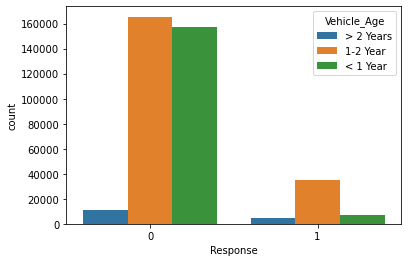

In [25]:
sns.countplot(hue='Vehicle_Age',x='Response',data=train)

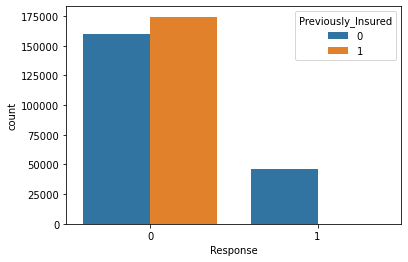

In [26]:
sns.countplot(hue='Previously_Insured',x='Response',data=train)

1) Customer who dont have 'Previous Vehicle Insurance' are the ones who are most interested which is very obvious. 
People who have a Insurance already does not want to Switch Company

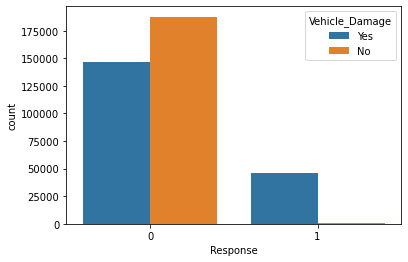

In [27]:
sns.countplot(hue='Vehicle_Damage',x='Response',data=train)

1) People who had 'Vehicle Damage' are the one who are interested in Switching To new Vehicle Insurance may be because of the Offers or less price offered. If there are vehicle damages, insurance premium  gets increased the follwoing year

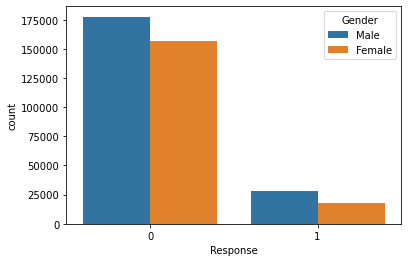

In [28]:
sns.countplot(hue='Gender',x='Response',data=train)

In [29]:
## Binning Annual Premium
## min: 2630, max: 540165.000000, mean around : 39K
def Premium_bin(Premium):
    if 0 < Premium[0] <= 5000:
        return 'Less than 5000'
    elif 5001 < Premium[0] <= 10000:
        return '5000-10000'
    elif 10001 < Premium[0] <= 20000:
        return '10000-20000'
    elif 20001 < Premium[0] <= 30000:
        return '20000-30000'
    elif 30001 < Premium[0] <= 40000:
        return '30000-40000'
    elif 40001 < Premium[0] <= 50000:
        return '40000-50000'
    elif 50001 < Premium[0] <= 60000:
        return '50000-60000'
    else:
        return 'Greater than 60k'

In [30]:
train['Premium_bin'] = train[['Annual_Premium']].apply(Premium_bin,axis=1)

In [31]:
#vintage Binning
#Max-299, Mean-154, Min-10
def Vintage_bin(Vintage):
    if 0 < Vintage[0] <= 30:
        return 'Less than 1 Month'
    elif 31 < Vintage[0] <= 60:
        return 'BTW 1 to 2 Months'
    elif 61 < Vintage[0] <= 90:
        return 'BTW 2 to 3 Months'
    elif 91 < Vintage[0] <= 120:
        return 'BTW 3 to 4 Months'
    elif 121 < Vintage[0] <= 150:
        return 'BTW 4 to 5 Months'
    elif 151 < Vintage[0] <= 180:
        return 'BTW 5 to 6 Months'
    else:
        return 'Greater than 6 Months'

In [32]:
train['Vintage_bin'] = train[['Vintage']].apply(Vintage_bin,axis=1)

In [33]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_bin,Premium_bin,Vintage_bin
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,41-50,40000-50000,Greater than 6 Months
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,71-80,30000-40000,Greater than 6 Months
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,41-50,30000-40000,Less than 1 Month
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Greater than 80,20000-30000,Greater than 6 Months
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,21-30,20000-30000,BTW 1 to 2 Months


In [34]:
train['Premium_bin'].value_counts()

30000-40000         125041
20000-30000          95391
Less than 5000       64877
40000-50000          57769
50000-60000          20039
Greater than 60k     12184
10000-20000           5803
5000-10000               5
Name: Premium_bin, dtype: int64

1) About 50%  of the Insurance Premium Falls between 30000-40000 & 20000-30000
2) Around 1 % of people fall under insurance range of less than 20000 rs

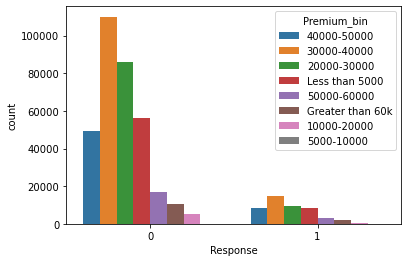

In [35]:
sns.countplot(hue='Premium_bin',x='Response',data=train)

In [36]:
train['Vintage_bin'].value_counts()

Greater than 6 Months    162827
BTW 2 to 3 Months         38400
BTW 4 to 5 Months         38236
BTW 3 to 4 Months         38221
BTW 1 to 2 Months         38065
BTW 5 to 6 Months         37834
Less than 1 Month         27526
Name: Vintage_bin, dtype: int64

1) Around 40% of the Customers were associated with company for more than 6 months

In [37]:
train.groupby(['Premium_bin','Vintage_bin','Response']).count().sort_values('Age').head(50)

id  Gender   Age  \
Premium_bin      Vintage_bin           Response                       
5000-10000       Greater than 6 Months 1            1       1     1   
                 BTW 5 to 6 Months     0            1       1     1   
                 BTW 2 to 3 Months     0            1       1     1   
                 Greater than 6 Months 0            2       2     2   
10000-20000      BTW 4 to 5 Months     1           34      34    34   
                 Less than 1 Month     1           36      36    36   
                 BTW 3 to 4 Months     1           42      42    42   
                 BTW 5 to 6 Months     1           46      46    46   
                 BTW 1 to 2 Months     1           48      48    48   
                 BTW 2 to 3 Months     1           50      50    50   
Greater than 60k Less than 1 Month     1          128     128   128   
                 BTW 3 to 4 Months     1          164     164   164   
                 BTW 2 to 3 Months     1          174     174   174   
                 BTW 1 to 2 Months     1          175     175   175   
                 BTW 4 to 5 Months     1          189     189   189   
50000-60000      Less than 1 Month     1          196     196   196   
Greater than 60k BTW 5 to 6 Months     1          197     197   197   
10000-20000      Greater than 6 Months 1          200     200   200   
50000-60000      BTW 2 to 3 Months     1          287     287   287   
                 BTW 3 to 4 Months     1          300     300   300   
                 BTW 5 to 6 Months     1          307     307   307   
                 BTW 1 to 2 Months     1          309     309   309   
                 BTW 4 to 5 Months     1          318     318   318   
10000-20000      Less than 1 Month     0          368     368   368   
                 BTW 3 to 4 Months     0          498     498   498   
                 BTW 2 to 3 Months     0          530     530   530   
                 BTW 1 to 2 Months     0          546     546   546   
                 BTW 5 to 6 Months     0          559     559   559   
                 BTW 4 to 5 Months     0          567     567   567   
40000-50000      Less than 1 Month     1          567     567   567   
Less than 5000   Less than 1 Month     1          606     606   606   
Greater than 60k Less than 1 Month     0          712     712   712   
20000-30000      Less than 1 Month     1          732     732   732   
Greater than 60k Greater than 6 Months 1          815     815   815   
Less than 5000   BTW 4 to 5 Months     1          816     816   816   
40000-50000      BTW 1 to 2 Months     1          820     820   820   
                 BTW 5 to 6 Months     1          821     821   821   
Less than 5000   BTW 3 to 4 Months     1          823     823   823   
40000-50000      BTW 2 to 3 Months     1          827     827   827   
                 BTW 4 to 5 Months     1          828     828   828   
Less than 5000   BTW 5 to 6 Months     1          837     837   837   
40000-50000      BTW 3 to 4 Months     1          849     849   849   
Less than 5000   BTW 2 to 3 Months     1          887     887   887   
                 BTW 1 to 2 Months     1          893     893   893   
20000-30000      BTW 3 to 4 Months     1          909     909   909   
                 BTW 5 to 6 Months     1          951     951   951   
                 BTW 2 to 3 Months     1          956     956   956   
                 BTW 4 to 5 Months     1          972     972   972   
                 BTW 1 to 2 Months     1          983     983   983   
Greater than 60k BTW 5 to 6 Months     0         1006    1006  1006   

                                                 Driving_License  Region_Code  \
Premium_bin      Vintage_bin           Response                                 
5000-10000       Greater than 6 Months 1                       1            1   
                 BTW 5 to 6 Months     0                       1            1   
                 BTW 2 to 3 Months

#(6333+4072+3566)/46710
1)30 % of Customers who said 'yes' to Vehicle insurance are associated with the Insurance for greater than 6 months with premium 20-50K

In [38]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_bin,Premium_bin,Vintage_bin
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,41-50,40000-50000,Greater than 6 Months
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,71-80,30000-40000,Greater than 6 Months
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,41-50,30000-40000,Less than 1 Month
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Greater than 80,20000-30000,Greater than 6 Months
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,21-30,20000-30000,BTW 1 to 2 Months


In [78]:
train.groupby(['Region_Code','Response']).count()['Age']

Region_Code  Response
0.0          0           1847
             1            174
1.0          0            899
             1            109
2.0          0           3751
                         ... 
50.0         1            642
51.0         0            155
             1             28
52.0         0            234
             1             33
Name: Age, Length: 106, dtype: int64

In [39]:
train['Driving_License']=train['Driving_License'].astype('category')
train['Region_Code']=train['Region_Code'].astype('category')
train['Previously_Insured']=train['Previously_Insured'].astype('category')
train['Vehicle_Age']=train['Vehicle_Age'].astype('category')
train['Policy_Sales_Channel']=train['Policy_Sales_Channel'].astype('category')

In [40]:
encodedDF = pd.get_dummies(train[['Gender','Vehicle_Age','Vehicle_Damage','Age_bin','Premium_bin','Vintage_bin']])

In [41]:
train_other=train[['Previously_Insured']]

In [42]:
X = pd.concat([encodedDF,train.drop(['id','Gender','Age','Vintage','Annual_Premium','Vehicle_Age',
                                     'Vehicle_Damage','Premium_bin','Vintage_bin','Age_bin','Response'],axis=1)],axis=1)

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender_Female                      381109 non-null  uint8   
 1   Gender_Male                        381109 non-null  uint8   
 2   Vehicle_Age_1-2 Year               381109 non-null  uint8   
 3   Vehicle_Age_< 1 Year               381109 non-null  uint8   
 4   Vehicle_Age_> 2 Years              381109 non-null  uint8   
 5   Vehicle_Damage_No                  381109 non-null  uint8   
 6   Vehicle_Damage_Yes                 381109 non-null  uint8   
 7   Age_bin_11-20                      381109 non-null  uint8   
 8   Age_bin_21-30                      381109 non-null  uint8   
 9   Age_bin_31-40                      381109 non-null  uint8   
 10  Age_bin_41-50                      381109 non-null  uint8   
 11  Age_bin_51-60             

# Model Building

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
y= train['Response']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=101)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
log = LogisticRegression()

In [49]:
log.fit(X_train,y_train)

C:\Users\srika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [50]:
log.intercept_

array([-0.70822869])

In [51]:
log.coef_

array([[-3.96279494e-01, -3.10672373e-01, -6.69417503e-02,
        -8.14002657e-01,  1.73992540e-01, -1.52962437e+00,
         8.22672502e-01, -5.26683756e-01,  3.36471503e-01,
         6.27967713e-01,  3.16618290e-01,  5.45529234e-02,
        -6.62973188e-01, -9.87111013e-01,  1.34205660e-01,
        -4.60100129e-02, -1.38329907e-01, -1.36716622e-01,
        -1.05237901e-01,  1.36843320e-03, -4.77616076e-02,
        -4.16060965e-02, -1.92658154e-01, -7.69770250e-02,
        -1.36870447e-01, -1.26199696e-01, -1.07522022e-01,
        -1.21128299e-01, -5.38805389e-02, -8.43738396e-02,
        -4.76691684e-01,  3.94309854e-04, -2.69721497e+00,
        -1.94562471e-03]])

In [52]:
predict = log.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score

In [54]:
print(accuracy_score(y_test,predict))
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))
print(roc_auc_score(y_test,predict))

0.8786046023457794
[[66969     2]
 [ 9251     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     66971
           1       0.00      0.00      0.00      9251

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222

0.4999850681638321


# Unable to predict any customers who bought policy as would buy. True positive is 0 using LR

# Testing Data

In [55]:
test=pd.read_csv('test.csv')

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [57]:
test['Age_bin'] = test[['Age']].apply(age_bin,axis=1)
test['Premium_bin'] =test[['Annual_Premium']].apply(Premium_bin,axis=1)
test['Vintage_bin'] = test[['Vintage']].apply(Vintage_bin,axis=1)
test['Driving_License']=test['Driving_License'].astype('category')
test['Region_Code']=test['Region_Code'].astype('category')
test['Previously_Insured']=test['Previously_Insured'].astype('category')
test['Vehicle_Age']=test['Vehicle_Age'].astype('category')
test['Policy_Sales_Channel']=test['Policy_Sales_Channel'].astype('category')

In [58]:
encodedDF_test = pd.get_dummies(test[['Gender','Vehicle_Age','Vehicle_Damage','Age_bin','Premium_bin','Vintage_bin']])

In [59]:
test_X = pd.concat([encodedDF_test,test.drop(['id','Gender','Age','Vintage','Annual_Premium','Vehicle_Age',
'Vehicle_Damage','Premium_bin','Vintage_bin','Age_bin'],axis=1)],axis=1)

In [60]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender_Female                      127037 non-null  uint8   
 1   Gender_Male                        127037 non-null  uint8   
 2   Vehicle_Age_1-2 Year               127037 non-null  uint8   
 3   Vehicle_Age_< 1 Year               127037 non-null  uint8   
 4   Vehicle_Age_> 2 Years              127037 non-null  uint8   
 5   Vehicle_Damage_No                  127037 non-null  uint8   
 6   Vehicle_Damage_Yes                 127037 non-null  uint8   
 7   Age_bin_11-20                      127037 non-null  uint8   
 8   Age_bin_21-30                      127037 non-null  uint8   
 9   Age_bin_31-40                      127037 non-null  uint8   
 10  Age_bin_41-50                      127037 non-null  uint8   
 11  Age_bin_51-60             

In [61]:
test_X.head()

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Age_bin_11-20,Age_bin_21-30,Age_bin_31-40,...,Vintage_bin_BTW 2 to 3 Months,Vintage_bin_BTW 3 to 4 Months,Vintage_bin_BTW 4 to 5 Months,Vintage_bin_BTW 5 to 6 Months,Vintage_bin_Greater than 6 Months,Vintage_bin_Less than 1 Month,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel
0,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,11.0,1,152.0
1,0,1,1,0,0,0,1,0,0,1,...,0,1,0,0,0,0,1,28.0,0,7.0
2,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,28.0,0,124.0
3,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,1,27.0,1,152.0
4,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,1,28.0,1,152.0


In [62]:
prediction_LR=log.predict(test_X)

In [63]:
prediction_LR_df=pd.DataFrame(prediction_LR)

# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf=RandomForestClassifier()

In [66]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
predict_rf = rf.predict(X_test)

In [69]:
print(accuracy_score(y_test,predict_rf))
print(confusion_matrix(y_test,predict_rf))
print(classification_report(y_test,predict_rf))
print(roc_auc_score(y_test,predict_rf))

0.859541864553541
[[64153  2818]
 [ 7888  1363]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     66971
           1       0.33      0.15      0.20      9251

    accuracy                           0.86     76222
   macro avg       0.61      0.55      0.56     76222
weighted avg       0.82      0.86      0.84     76222

0.552628754438184


In [70]:
prediction_rf=rf.predict(test_X)

In [71]:
prediction_rf_df=pd.DataFrame(prediction_rf)

In [72]:
prediction_rf_df.to_csv('Submission_rf_v1.0.csv')

In [73]:
sorted(list(zip(rf.feature_importances_,X.columns)),reverse= True)

[(0.35940515223267105, 'Region_Code'),
 (0.2020767464796628, 'Policy_Sales_Channel'),
 (0.08737711940139864, 'Vehicle_Damage_Yes'),
 (0.07079920496576982, 'Vehicle_Damage_No'),
 (0.06771171002680669, 'Previously_Insured'),
 (0.022508023320760483, 'Vehicle_Age_< 1 Year'),
 (0.01226416904534237, 'Age_bin_31-40'),
 (0.011534360035095066, 'Vehicle_Age_1-2 Year'),
 (0.010612768702235667, 'Vintage_bin_Greater than 6 Months'),
 (0.009141452809663117, 'Age_bin_21-30'),
 (0.009010126139030964, 'Age_bin_41-50'),
 (0.008594099991697338, 'Premium_bin_30000-40000'),
 (0.008429823430399245, 'Vintage_bin_BTW 4 to 5 Months'),
 (0.008422763496747412, 'Vintage_bin_BTW 5 to 6 Months'),
 (0.008403015947942587, 'Vintage_bin_BTW 1 to 2 Months'),
 (0.008170453318748399, 'Vintage_bin_BTW 2 to 3 Months'),
 (0.008134541201360646, 'Vintage_bin_BTW 3 to 4 Months'),
 (0.007713839761574967, 'Vintage_bin_Less than 1 Month'),
 (0.0076357786992818305, 'Premium_bin_20000-30000'),
 (0.007319814249847907, 'Premium_bin_Le

In [81]:
'''from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
params= {'n_estimators':[200,500,700],'max_depth':[10,15,18,20],
        'min_samples_leaf':[3,5,7]}
gs=GridSearchCV(rf,params,verbose=3,n_jobs=-1)
gs.fit(X_train,y_train)
gs.best_params_
gs.best_estimator_'''

# LGB

In [87]:
import lightgbm as lgb

In [88]:
lgbc=lgb.LGBMClassifier()

In [90]:
lgbc.fit(X_train, y_train)

LGBMClassifier()

In [91]:
predict_lgbc=lgbc.predict(X_test)

In [92]:
print(accuracy_score(y_test,predict_lgbc))
print(confusion_matrix(y_test,predict_lgbc))
print(classification_report(y_test,predict_lgbc))
print(roc_auc_score(y_test,predict_lgbc))

0.8788013959224371
[[66948    23]
 [ 9215    36]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     66971
           1       0.61      0.00      0.01      9251

    accuracy                           0.88     76222
   macro avg       0.74      0.50      0.47     76222
weighted avg       0.85      0.88      0.82     76222

0.5017740194802209


In [105]:
prediction_lgb=lgbc.predict(test_X)

In [106]:
prediction_lgb_df=pd.DataFrame(prediction_lgb)

In [107]:
prediction_lgb_df.to_csv('Submission_lgb_v1.0.csv')

# XGB

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_fit = GradientBoostingClassifier(n_estimators=5000,
                                     min_samples_split=2,min_samples_leaf=1,max_depth=1,random_state=42 )

In [102]:
                                    
gbc_fit.fit(X_train,y_train)


GradientBoostingClassifier(max_depth=1, n_estimators=5000, random_state=42)

In [103]:
predict_gbc=gbc_fit.predict(X_test)

In [104]:
print(accuracy_score(y_test,predict_gbc))
print(confusion_matrix(y_test,predict_gbc))
print(classification_report(y_test,predict_gbc))
print(roc_auc_score(y_test,predict_gbc))

0.8786308414893338
[[66970     1]
 [ 9250     1]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     66971
           1       0.50      0.00      0.00      9251

    accuracy                           0.88     76222
   macro avg       0.69      0.50      0.47     76222
weighted avg       0.83      0.88      0.82     76222

0.5000465822929202


In [108]:
prediction_xgb=gbc_fit.predict(test_X)

In [109]:
prediction_xgb_df=pd.DataFrame(prediction_xgb)

In [110]:
prediction_xgb_df.to_csv('Submission_xgb_v1.0.csv')

# Basic Neural Network

In [160]:
from keras import Sequential
from keras import optimizers
from keras.layers import Dense,Conv2D,Activation,Flatten,MaxPooling2D

In [161]:
model=Sequential()

In [162]:
X_train.shape[1]

34

In [163]:
model.add(Dense(34,input_shape=(34,),activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='softmax'))

In [164]:
from keras import optimizers

In [165]:
adam=optimizers.Adam(lr=0.001)

In [166]:
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [167]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 34)                1190      
_________________________________________________________________
dense_26 (Dense)             (None, 15)                525       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 11        
Total params: 1,886
Trainable params: 1,886
Non-trainable params: 0
_________________________________________________________________


In [168]:
history=model.fit(X_train,y_train,batch_size=50,validation_split=0.2, epochs=100,verbose=1)

Train on 243909 samples, validate on 60978 samples
Epoch 1/100
243909/243909 [==============================] - 11s 44us/step - loss: 13.4530 - accuracy: 0.1226 - val_loss: 13.4348 - val_accuracy: 0.1238
Epoch 2/100
243909/243909 [==============================] - 11s 44us/step - loss: 13.4530 - accuracy: 0.1226 - val_loss: 13.4348 - val_accuracy: 0.1238
Epoch 3/100
243909/243909 [==============================] - 11s 43us/step - loss: 13.4530 - accuracy: 0.1226 - val_loss: 13.4348 - val_accuracy: 0.1238
Epoch 4/100
243909/243909 [==============================] - 11s 46us/step - loss: 13.4530 - accuracy: 0.1226 - val_loss: 13.4348 - val_accuracy: 0.1238
Epoch 5/100
243909/243909 [==============================] - 13s 52us/step - loss: 13.4530 - accuracy: 0.1226 - val_loss: 13.4348 - val_accuracy: 0.1238
Epoch 6/100
243909/243909 [==============================] - 13s 52us/step - loss: 13.4530 - accuracy: 0.1226 - val_loss: 13.4348 - val_accuracy: 0.1238
Epoch 7/100
243909/243909 [====

Epoch 54/100
243909/243909 [==============================] - 12s 47us/step - loss: 13.4530 - accuracy: 0.1226 - val_loss: 13.4348 - val_accuracy: 0.1238
Epoch 55/100
243909/243909 [==============================] - 12s 48us/step - loss: 13.4530 - accuracy: 0.1226 - val_loss: 13.4348 - val_accuracy: 0.1238
Epoch 56/100
243909/243909 [==============================] - 12s 48us/step - loss: 13.4530 - accuracy: 0.1226 - val_loss: 13.4348 - val_accuracy: 0.1238
Epoch 57/100
243909/243909 [==============================] - 12s 48us/step - loss: 13.4530 - accuracy: 0.1226 - val_loss: 13.4348 - val_accuracy: 0.1238
Epoch 58/100
243909/243909 [==============================] - 12s 48us/step - loss: 13.4530 - accuracy: 0.1226 - val_loss: 13.4348 - val_accuracy: 0.1238
Epoch 59/100
243909/243909 [==============================] - 12s 48us/step - loss: 13.4530 - accuracy: 0.1226 - val_loss: 13.4348 - val_accuracy: 0.1238
Epoch 60/100
243909/243909 [==============================] - 12s 48us/step 

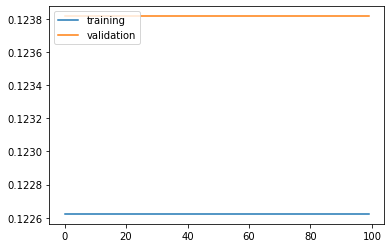

In [169]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'],loc='upper left')
plt.show()

In [172]:
train_pred_cn=model.predict(X_train)

In [173]:
test_pred_cn=model.predict(X_test)

In [174]:
pred_train_prod=np.where(train_pred_cn>=0.5,1,0)
pred_test_prob=np.where(test_pred_cn>=0.5,1,0)

In [176]:
accuracy_score(y_train,pred_train_prod)

0.12286191277424095

In [177]:
accuracy_score(y_test,pred_test_prob)

0.12136915851066621

# Conclusion

Have binned Age, Annual premium and Vintage(how long customer associated with the company)
Logistic Regression, XGB, LGB 49% Accuracy- these gave a very low True Positive Value
Random Forest gave 55% Accuracy- had better Precision
Basic Neural network- 12% Accuracy

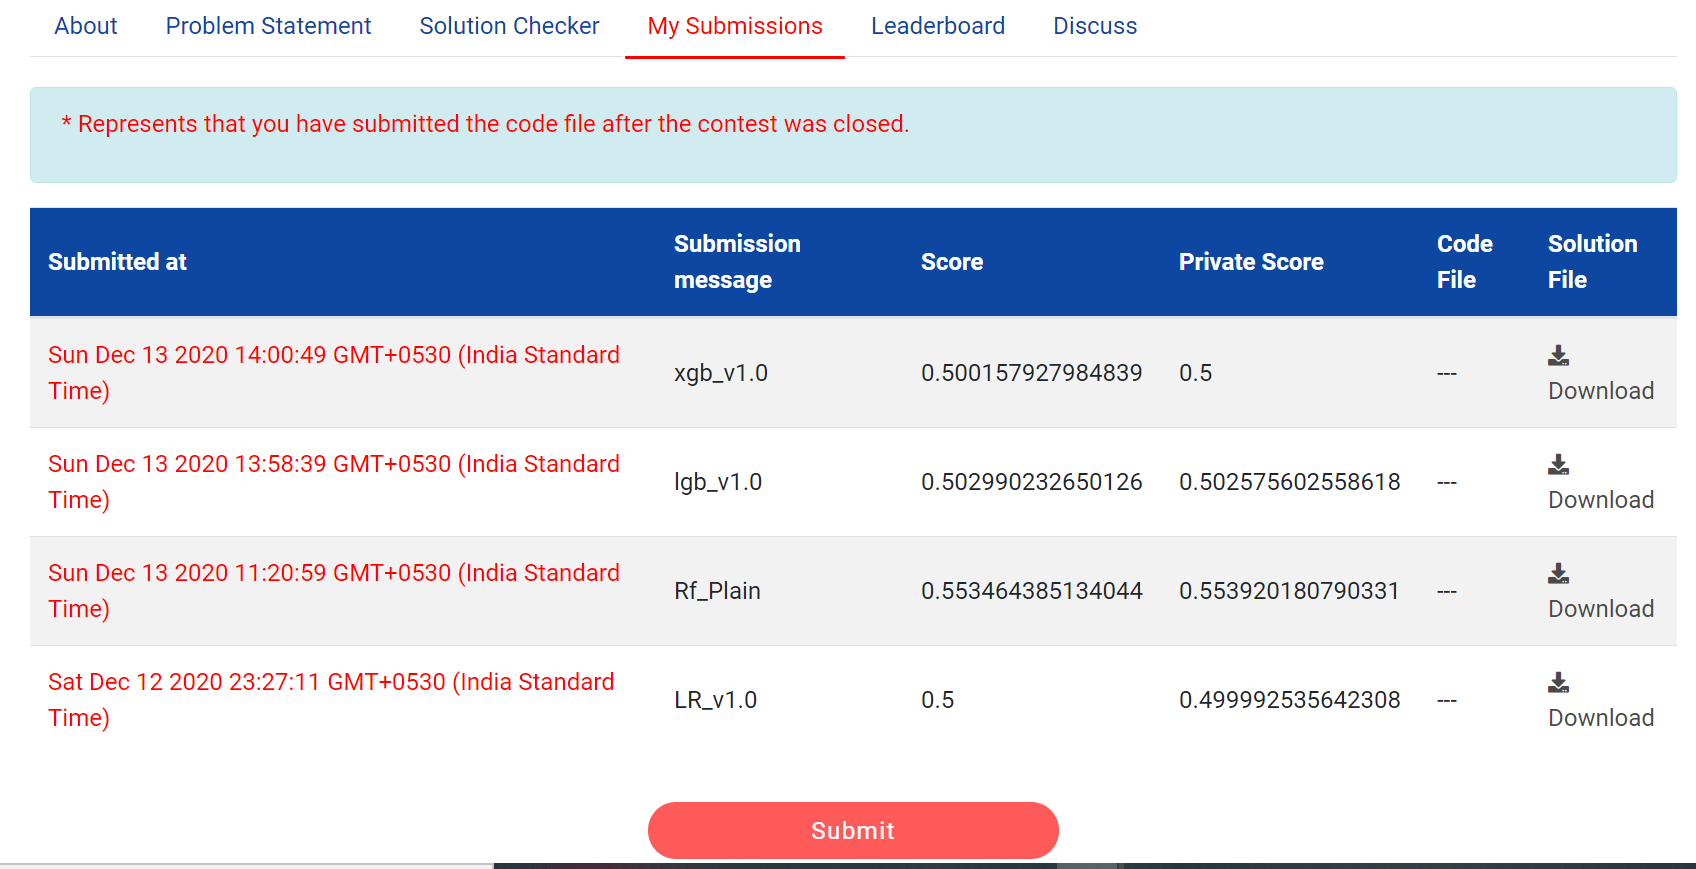